# Data Exploratory (EDA)
## Costumer loans dataset


In [33]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("orig_train.csv")
df.head(20)

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0000,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0000,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0000,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0000,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0000,5,...,1,1,1,0,0,0,0,0,0,0
5,C,40,Rural area,Owner without mortgage,Missing,single,1,0,740.0000,7,...,1,0,0,0,0,0,0,0,0,0
6,C,45,County capital,Owner without mortgage,Missing,married,3,1,1010.0000,7,...,12,0,0,0,0,0,0,0,0,0
7,B,27,Rural area,Living with family,Post secondary school,single,1,0,630.0000,4,...,2,0,0,0,0,0,0,0,0,1
8,C,45,Rural area,Owner without mortgage,Other,married,2,0,816.8000,20,...,1,1,1,0,0,0,0,0,0,0
9,F,34,County capital,Living with family,Post-graduate,married,3,1,2373.0000,4,...,13,0,0,0,0,0,0,0,0,0


In [5]:
len(df)

15097

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [9]:
df.describe()
df.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


## Dataset Description
#### Variables in order:
**PRODUCT** - Type of financial product the client has  
**AGE** - age of client  
**AREA** - The geographical area where the client resides  
**RESIDENTAL_PLACE** -  Indicates whether the client owns their living place (with further distinction on having a mortgage or not), lives with family, or is renting  
**EDUCATION** - The highest level of education attained by the client  
**MARTIAL_STATUS** - Describes the client's marital status, including options such as single, married, divorced, or widowed  
**HOUSEHOLD_MEMBERS** - The number of people living in the client's household  
**NO_OF_DEPENDENTS** - The number of individuals financially dependent on the client  
**INCOME** - The client's monthly income  
**WORK_SENIORITY** - The total number of years the client has been working  
**LENGTH_RELATIONSHIP_WITH_CLIENT**	- The duration (in years) of the client's relationship with the bank  
**DEBIT_CARD**- wheter clinet owns a debit card or not  
**CURRENT_ACCOUNT** -  wheter client owns a current account  
**SAVING_ACCOUNT** - wheter client owns a saving account  
**SALARY_ACCOUNT** - Indicates whether the client has a salary account with the bank, designed for receiving payroll  
**FOREIGN_ACCOUNT** -  Whether the client holds any bank accounts in foreign countries  
**FINALIZED_LOAN** - The number of loans the client has fully repaid  
**DEPOSIT** -   Indicates whether the client has made any fixed or term deposits with the bank  
**PENSION_FUNDS** - Whether the client has invested in any pension funds through the bank  
**DEFAULT_FLAG** -A binary indicator (e.g., Yes/No, 1/0) showing whether the client has defaulted on any financial obligation 



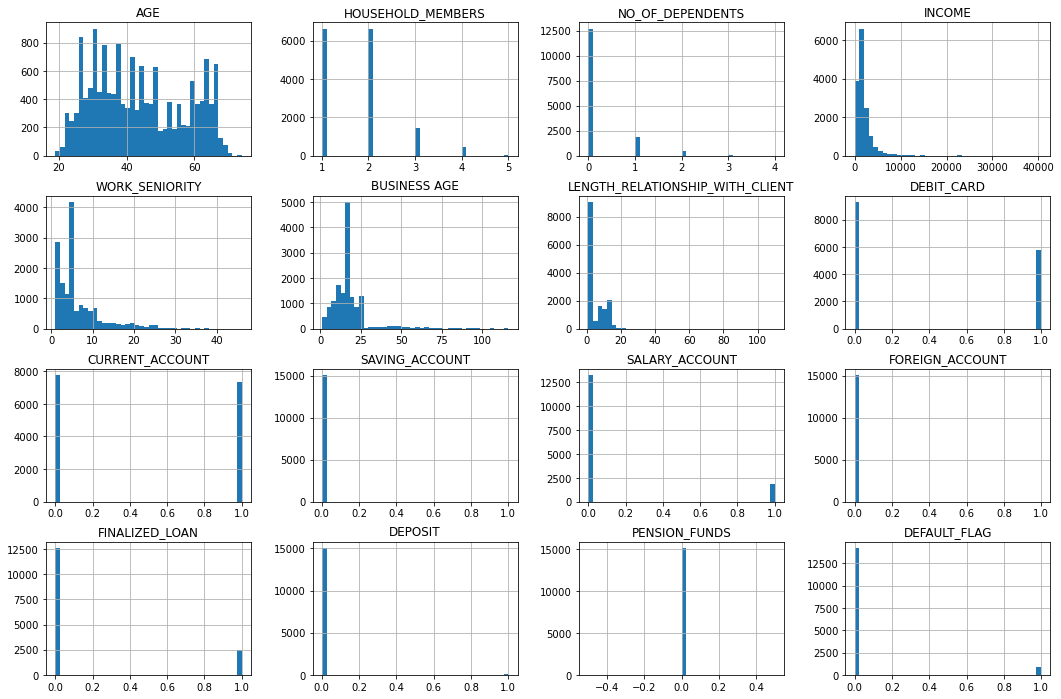

In [10]:
df.hist(bins = 40, figsize=(18, 12))
plt.show()

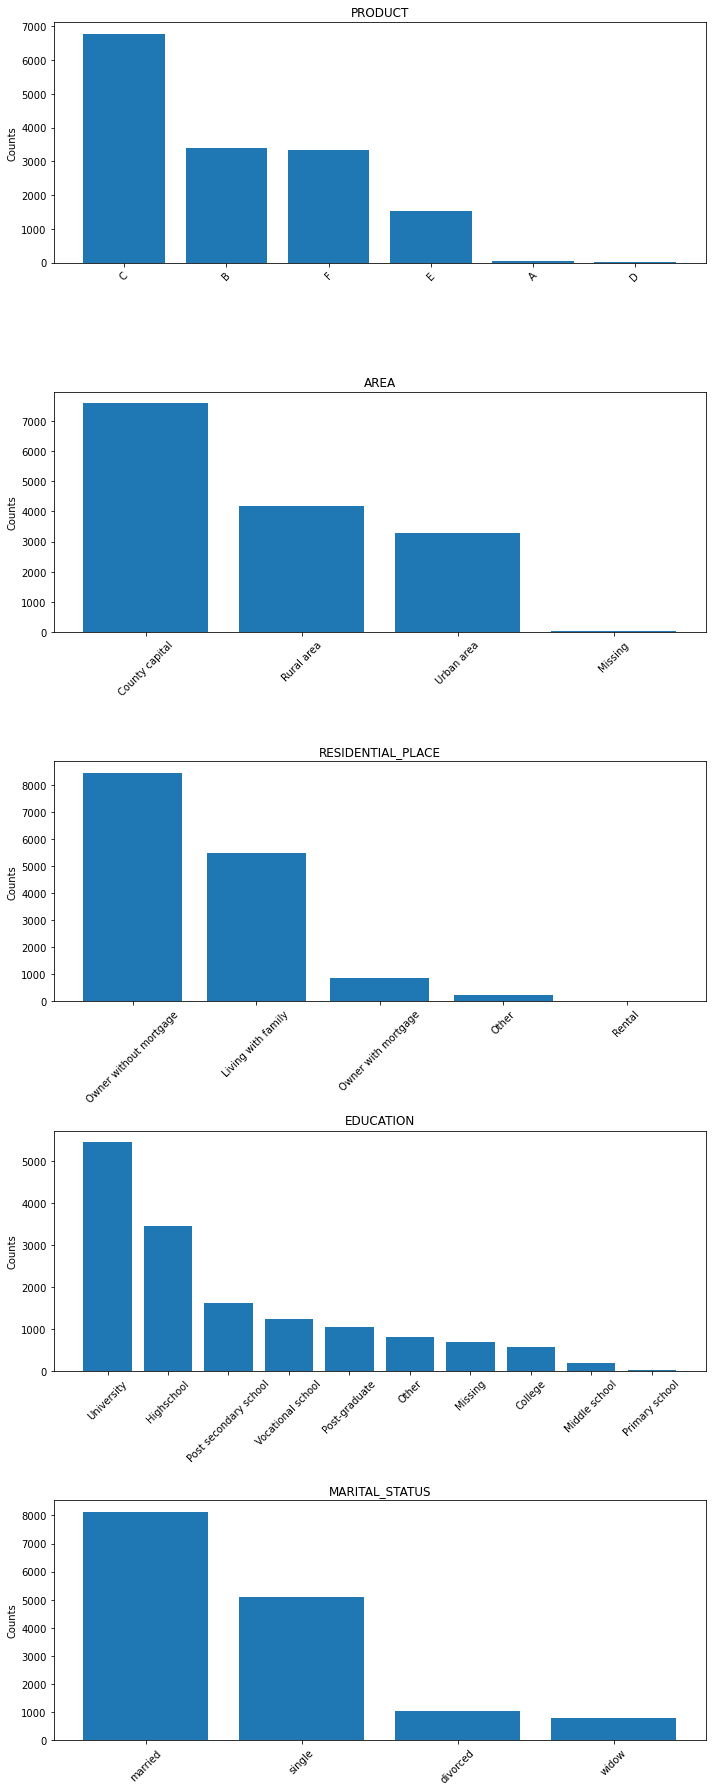

In [32]:
df_strings = df[["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS"]]
fig, axs = plt.subplots(nrows= 5, ncols=1, figsize=(10, 5 * 5))
for ax, column in zip(axs, ["PRODUCT", "AREA", "RESIDENTIAL_PLACE", "EDUCATION", "MARITAL_STATUS"]):
    value_counts = df[column].value_counts()
    ax.bar(value_counts.index.astype(str), value_counts.values)
    ax.set_title(column)
    ax.set_ylabel('Counts')
    ax.tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()                         

In [45]:
# sns.pairplot(df, y_vars="INCOME", x_vars=df.columns.values[:5])
# sns.pairplot(df, y_vars="INCOME", x_vars=df.columns.values[5:10])
# sns.pairplot(df, y_vars="INCOME", x_vars=df.columns.values[10:15])
# sns.pairplot(df, y_vars="INCOME", x_vars=df.columns.values[15:])
# plt.show()

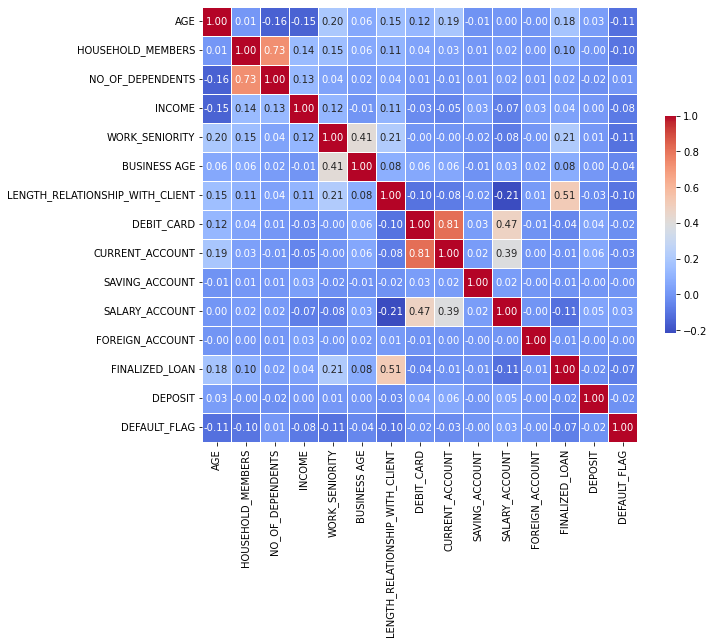

In [44]:
df = df.drop(columns = "PENSION_FUNDS")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()